In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
path = 'C:/Users/boran/Desktop/Data Cleaning/'
filename = 'result_geojson.geojson'
df= gpd.read_file(path+filename)
df.head()

,Unnamed: 0.1,Unnamed: 0_ysk,ilçe,mahalle,İlçe Adı,Mahalle/Köy,matched_district_ysk,matched_neighborhood_ysk,Bölge,İl Adı,...,spor ve spor ile ilgili dernekleri,toplumsal değerleri yaşatma dernekleri,uluslar arasi teşekküller ve işbirliği dernekleri,yaşli ve çocuklara yönelik dernekler,çevre doğal hayat hayvanlari koruma dernekleri,çocuk dernekleri,şehit yakini ve gazi dernekleri,din_meslek,Total,geometry
0,0,0,adalar,burgazada,adalar,burgazada,adalar,burgazada,1,istanbul,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,"POLYGON ((29.05742 40.88409, 29.05749 40.88361..."
1,1,1,adalar,heybeliada,adalar,heybeliada,adalar,heybeliada,1,istanbul,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,7.0,"POLYGON ((29.08321 40.87690, 29.08240 40.87680..."
2,2,2,adalar,kınalıada,adalar,kinaliada,adalar,kinaliada,1,istanbul,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,"POLYGON ((29.05556 40.90878, 29.05553 40.90895..."
3,3,3,adalar,maden,adalar,maden,adalar,maden,1,istanbul,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,"POLYGON ((29.12173 40.85214, 29.12175 40.85194..."
4,4,4,adalar,nizam,adalar,nizam,adalar,nizam,1,istanbul,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,"POLYGON ((29.12173 40.85214, 29.12159 40.85267..."


In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
columns_to_sum = [
    'bireysel öğreti ve toplumsal gelişim dernekleri',
       'dini hizmetlerin gerçekleştirilmesine yönelik faaliyet gösteren dernekler',
       'diş türkler ile dayanişma dernekleri', 'düşünce temelli dernekler',
       'engelli dernekleri', 'eğitim araştirma  dernekleri',
       'gida, tarim ve hayvancilik alaninda faaliyet gösteren dernekler',
       'hak ve savunuculuk dernekleri',
       'imar, şehircilik ve kalkindirma dernekleri',
       'insani yardim dernekleri',
       'kamu kurumlari ve personelini destekleyen dernekler',
       'kültür, sanat ve turizm dernekleri', 'mesleki ve dayanişma dernekleri',
       'sağlik alaninda faaliyet gösteren dernekler',
       'spor ve spor ile ilgili dernekleri',
       'toplumsal değerleri yaşatma dernekleri',
       'uluslar arasi teşekküller ve işbirliği dernekleri',
       'yaşli ve çocuklara yönelik dernekler',
       'çevre doğal hayat hayvanlari koruma dernekleri', 'çocuk dernekleri',
       'şehit yakini ve gazi dernekleri'
]
df['Total'] = df[columns_to_sum].sum(axis=1).reset_index(drop=True)
for column in columns_to_sum:
    df[column] = df[column].fillna(0)

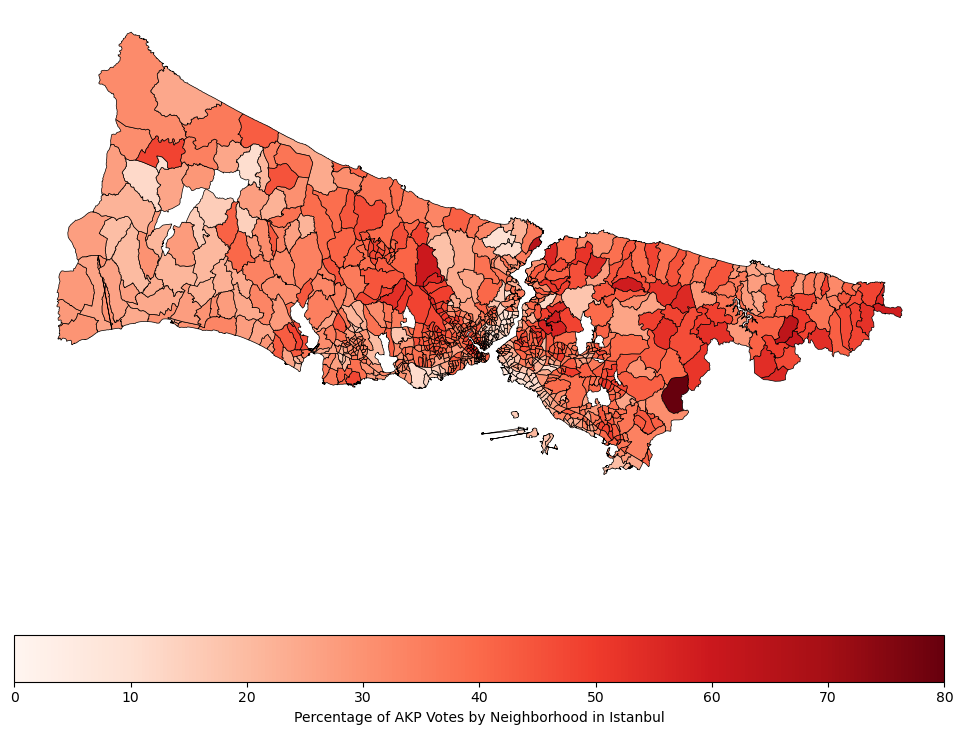

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df.plot(column='AK PARTİ', ax=ax, legend=True,
                 legend_kwds={'label': "Percentage of AKP Votes by Neighborhood in Istanbul",
                              'orientation': "horizontal"},cmap='Reds',vmin=0, vmax=80,edgecolor='black', linewidth=0.5)

# Removing the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

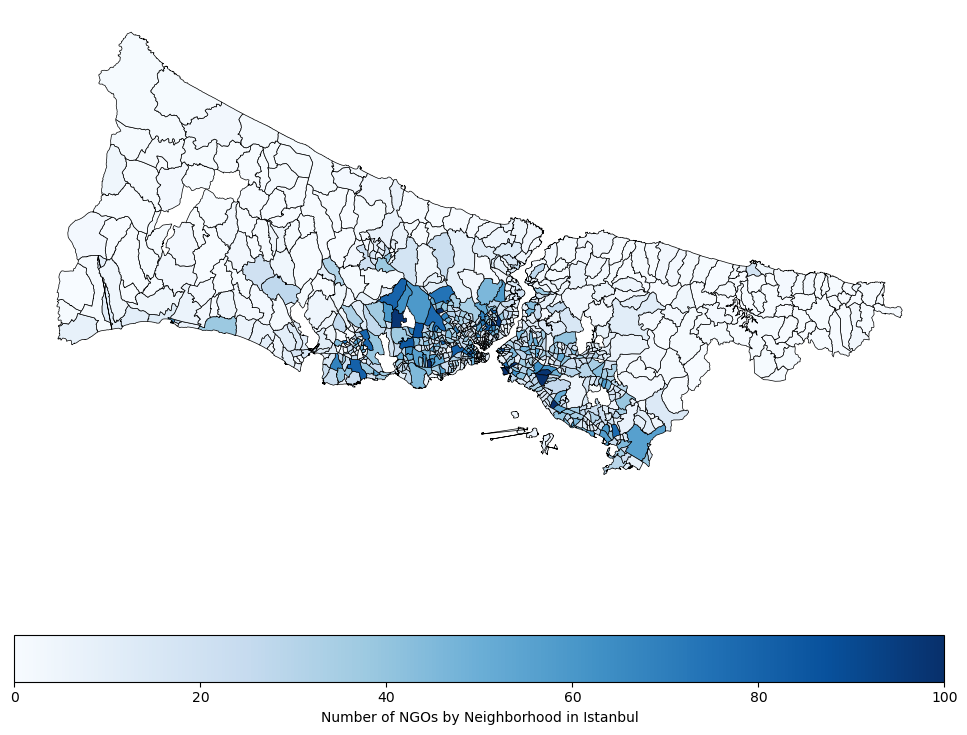

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df.plot(column='Total', ax=ax, legend=True,
                 legend_kwds={'label': "Number of NGOs by Neighborhood in Istanbul",
                              'orientation': "horizontal"},cmap='Blues',vmin=0, vmax=100,edgecolor='black', linewidth=0.5)


# Removing the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

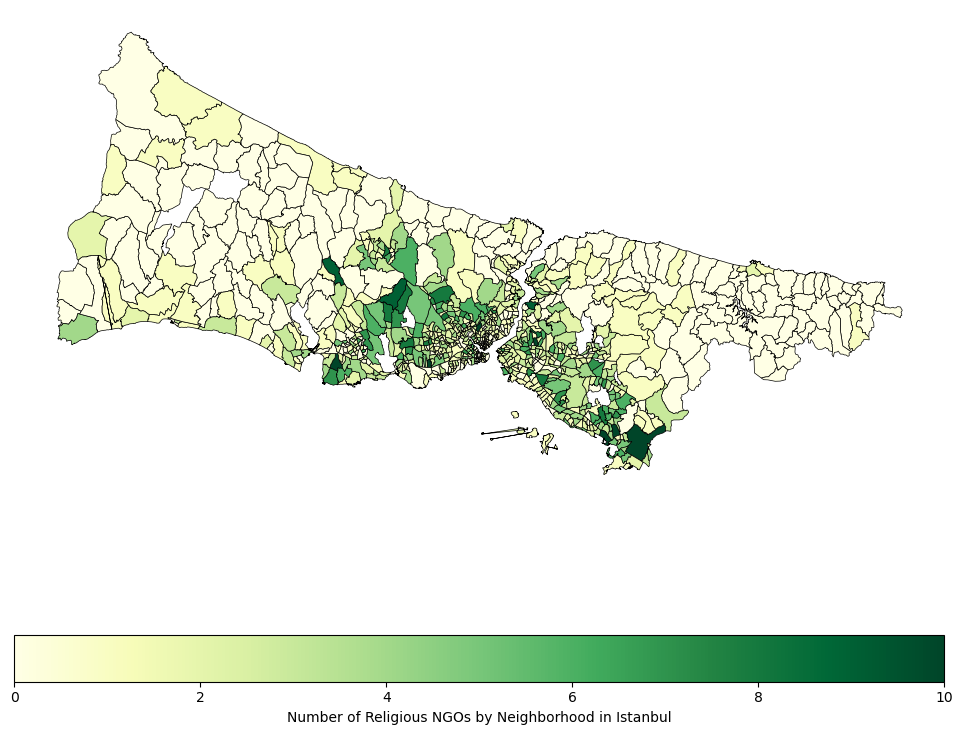

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df.plot(column='dini hizmetlerin gerçekleştirilmesine yönelik faaliyet gösteren dernekler', ax=ax, legend=True,
                 legend_kwds={'label': "Number of Religious NGOs by Neighborhood in Istanbul",
                              'orientation': "horizontal"}, cmap='YlGn',vmin=0, vmax=10, 
        edgecolor='black', linewidth=0.5)

# Removing the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

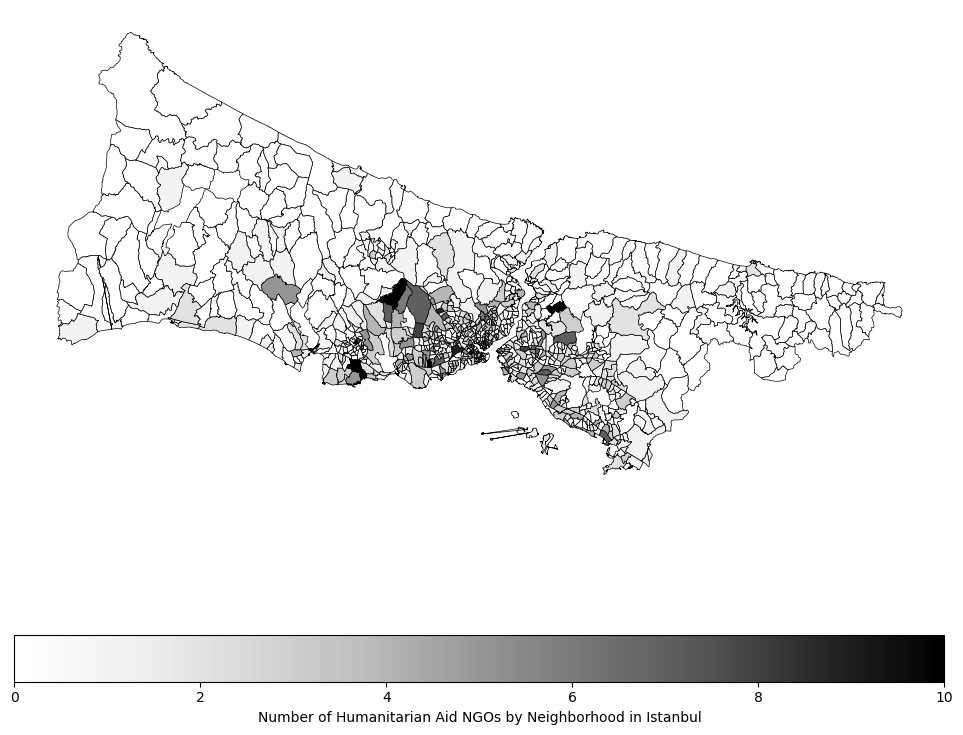

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
df.plot(column='insani yardim dernekleri', ax=ax, legend=True,
                 legend_kwds={'label': "Number of Humanitarian Aid NGOs by Neighborhood in Istanbul",
                              'orientation': "horizontal"}, cmap='Greys',vmin=0, vmax=10, 
        edgecolor='black', linewidth=0.5)

# Removing the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

In [98]:
filtered_df = df[df['Total']>0]

In [99]:
import statsmodels.api as sm

# Assuming df is your DataFrame and 'y' is your target variable
X = filtered_df[columns_to_sum]  # Start with one feature
X = sm.add_constant(X)  # Add a constant term
y = filtered_df['AK PARTİ']
 # Replace with your actual feature names
model = sm.OLS(y, X).fit()
print(model.summary())
print("\n")


                            OLS Regression Results                            
Dep. Variable:               AK PARTİ   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     13.25
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           9.06e-40
Time:                        23:54:43   Log-Likelihood:                -3212.9
No. Observations:                 869   AIC:                             6470.
Df Residuals:                     847   BIC:                             6575.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

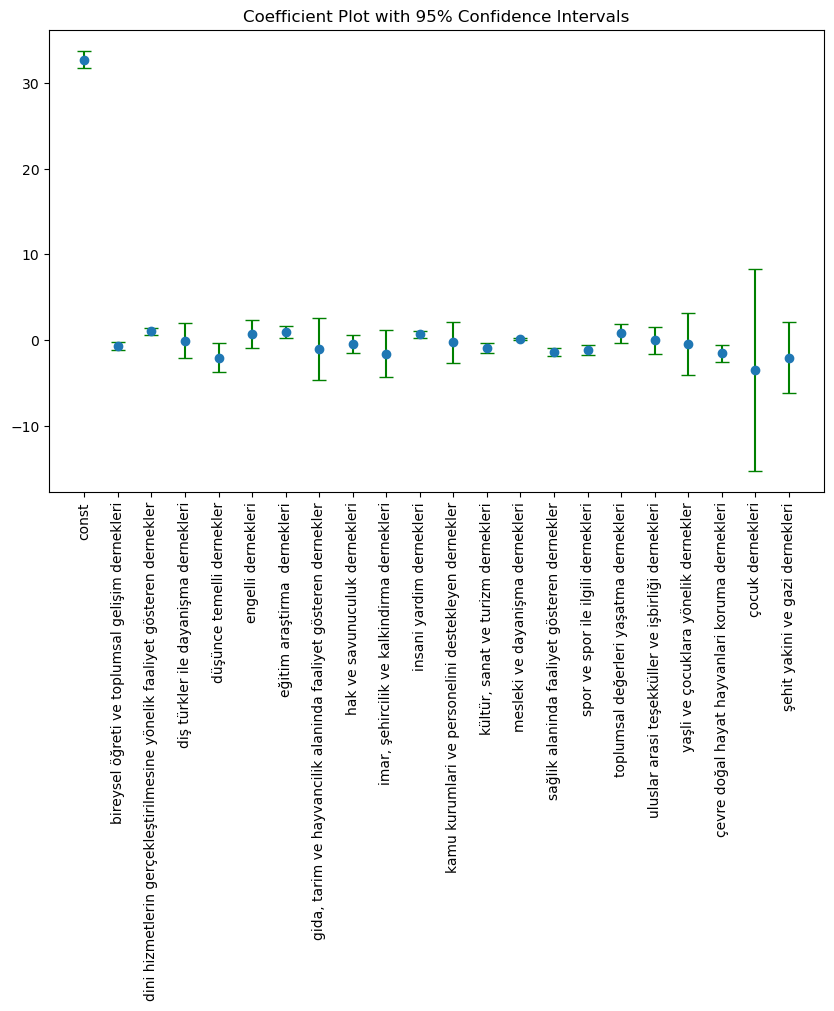

In [103]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming filtered_df is your DataFrame and 'AK PARTİ' is your target variable
X = filtered_df[columns_to_sum]  # Replace with your actual feature names
X = sm.add_constant(X)
y = filtered_df['AK PARTİ']

model = sm.OLS(y, X).fit()

# Extracting coefficients and standard errors
coef = model.params
std_err = model.bse
conf_int = model.conf_int()

# Calculating the error margins for 95% CI
error = 1.96 * std_err

# Coefficient Plot
plt.figure(figsize=(10, 6))
plt.errorbar(coef.index, coef, yerr=error, fmt='o', ecolor='g', capsize=5)
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.title('Coefficient Plot with 95% Confidence Intervals')
plt.show()
